### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** Virtual

# Proyecto Final Statistical Learning II

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

In [4]:
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from scipy import stats

# Segunda Parte - Convolutional Network

In [6]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout, InputLayer
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2, l1, l1_l2

# Planteamiento Inicial

El problema a tratar en este experimento es de clasificación con imágenes a color. El dataset es de fotografías de mini figuras de Lego con personajes de Marvel, Star Wars y Harry Potter, habiendo 4 clases: Spiderman, Yoda, Harry Potter y Luke Skywalker. El dataset esta separado en 3: training, validation y test, cada uno de estos cuenta con una cierta cantidad de imágenes para cada clase. 

El dataset en sí es bastante pequeño, ya que la clase que más imágenes cuenta tiene un total de 13 fotografías contando la cantidad en training, validation y test. Por tal razón se decide desde un inicio como estrategia para resolver el problema el utilizar la técnica de Transfer Learning ya que al ser un dataset muy reducido el entrenamiento desde cero de un modelo puede no producir una adecuada generalización para datos no vistos por el mismo.

Se realizará un análisis de diversas estructuras y modelos famosos y se decidirá por uno de ellos para hacer el transfer learning. Posterior se realizarán varios experimentos con ciertas modificaciones al modelo que se genere con transfer learning para configurar uno que pueda clasificar las imágenes.

Se espera que con esta estrategia se logre un nivel aceptable en la clasificación. Se realizará un análisis de métricas con dataset de training y validation para evaluar los modelos generados con experimentación y hacer la selección final.

# Análisis de Papers

## Densenet
Este modelo lo que indica es que una red convolucional puede ser más más exacta y eficiente al entrenar si hay conexiones más cortas tanto en la entrada como en la salida. Lo que hace Densenet entonces es conectar cada capa a otra capa adelante, entonces el feature map de las capas precedentes es usada como input de las capas siguientes.

Ventajas: mejora el desvanecimiento de gradiente, mejor propagación de características, reduce el número de parámetros.
Esta arquitectura requiere menos parámetros y capacidad computacional, puede ser también un buena extractor de características para varias tareas de visión por computadora.

## Faster R-CNN
Arquitectura para localización de objetos, reduce el tiempo de ejecución para esta tarea. Se introduce a Region Proposal Network (RPN) que es una red convolucional fully connected que simultáneamente predice bordes y objetividad en cada posición. Estas redes RPN son usadas por Faster R-CNN para detección. 

En los resultados se menciona puede correr a casi un ratio de cuadros en tiempo real y con mejora en la exactitud de la detección.

## Inception
En el paper se menciona que es una arquitectura de una red convolucional profunda que establece un nuevo estado del arte para clasificación y detección. Esta mejora la utilización de las fuentes computacionales dentro de la red. 
Esta estructura tiene la característica que se usan filtros de diferentes tamaños y también emplea capas pool del tipo máximo y promedio.
La capacidad computacional se mantiene constante mientras se permite aumentar la profundidad y ancho de la red en la arquitectura. 

## Lecun-99
Arquitectura para reconocimiento de objetos. Para reconocimiento de objetos con gran variabilidad tales como caracteres escritos a mano es ventajoso alimentar alimentar al sistema directamente con imágenes mínimamente procesadas para extraer un conjunto correcto de características. 

Se menciona acerca del Graph Transformer Network que es usado en gráficas para representar características, objetos y sus combinaciones. Estas redes reducen la necesidad heurísticas manuales, etiquetado manual, y tuneo manual de parámetros en sistemas de reconocimiento de documentos. Un ejemplo de aplicación comercial de la red Transformer es en bancos donde puede leer millones de cheques por día. 

## Mask R-CNN
Arquitectura para segmentación de objetos, esta detecta un objeto en una imagen mientras simultáneamente genera una máscara de segmentación para cada instancia. Es una extensión de Faster R-CNN que agrega una rama para predecir la máscara del objeto en paralelo con la existencia de los bordes de la caja de reconocimiento. 

## MobileNets
Modelos eficientes para dispositivos móviles y aplicaciones de visión que se basa en convoluciones separables. Con este modelo se usan dos hiperparámetros que compensan la latencia y exactitud, estos permiten escoger el tamaño correcto del modelo para su aplicación con base a las restricciones del problema. Estos hiperparámetros son el width multiplier y resolution multiplier.

Esta arquitectura ha mostrado buen desempeño en aplicaciones como detección de objetos, clasificación, geo-localización.

## Resnet
Es una arquitectura que facilita el entrenamiento de redes que están un poco más profundas que aquellas usadas previamente. Las capas son funciones residuales de aprendizaje con referencia a la capa de entrada, en lugar de funciones sin referencia. Estas redes referenciadas son más fáciles de optimizar y pueden ganar exactitud con la profundidad.

## U-Net
Red y estrategia de entrenamiento que usa un enfoque fuerte de aumentado de data que utiliza las muestras disponibles más eficientemente. La arquitectura consiste en una ruta para capturar contexto y una ruta expansiva de simetría que permite localización precisa. 

En los resultados se menciona que alcanza un buen desempeño en diferentes aplicaciones de segmentación biomédica, se necesita solo unas cuantas imágenes gracias al aumentado de data con deformaciones elásticas.

## YOLO9000
Sistema de detección de objetos en tiempo real que puede detectar más de 9000 categorías, que a su vez optimiza la clasificación. Permite predecir detecciones para clases de objetos que no tienen data etiquetada. 
Este modelo está entrenado en los dataset de ImageNet y COCO y está cerca de cerrar la brecha entre detección y clasificación.

## VGG
Arquitectura de red que incrementa la profundidad de 16 a 19 capas con filtros convolucionales pequeños de 3x3.
Esta representación generaliza bien a otros datasets. La profundidad de la red es beneficiosa para la exactitud en la clasificación, lo que confirma su importancia en las representaciones visuales.

### Análisis de VGG
En el paper se aborda una característica importante de las redes convolucionales, su profundidad. Se realizaron experimentos fijando otros parámetros de la arquitectura e incrementando la profundidad de la misma añadiendo más redes convolucionales (más de 19) y usando filtros de 3x3 para cada capa. Se menciona como resultado un incremento en la exactitud de las arquitecturas convnets. 

Este modelo alcanzó un 92.7% en top-5 test accuracy en el dataset de ImageNet, que contiene más de 14 millones de fotografías pertenecientes a 1000 clases, lo cual resulta en un modelo muy eficiente para clasificación de imágenes.

Como entrada tiene una capa de 224x224 para imágenes RGB, la imagen pasa a través de redes convolucionales con filtros pequeños de 3x3, con un padding de 1 y uso de capas maxpooling. Las capas ocultas tienen activación Relu.

El modelo de VGG mostró en los resultados tener un buen desempeño, teniendo un error de 6.8% con el ensamble de dos modelos. Por lo cual puede ser un modelo eficiente para clasificación de imágenes a gran escala y que a su vez es bueno para generalizar en otros datasets, resultando en un desempeño comparable a otros modelos convencionales como LeCun.
Entre los resultados que se muestran en el paper está la Generalización de Características profundas, donde se evalúa a VGG como extractor de características frente a otras arquitecturas como GoogLeNet, entre los resultados se muestra que VGG obtiene mejores resultados en la generalización de otros datasets.

### Elección del Modelo VGG para Resolver el Problema
Por tanto, dado la naturaleza del problema a resolver en esta parte del proyecto donde se pretende realizar la clasificación de imágenes de Lego contando con un dataset muy reducido se elige usar el modelo de VGG como extractor de características para realizar transfer learning. 

En el paper puede leerse que esta arquitectura tiene buen desempeño para problemas de clasificación y como extractor de características vs a otros, por lo que se espera sea una buena opción como modelo de entrada para realizar clasificación y posterior a este realizar algunos experimentos para evaluar que configuración adicional puede funcionar mejor.

### Directorios

In [7]:
dataTrain = 'C:/Users/Elda Calderon/OneDrive/Data Science/3 Trimestre/Statistical Learning II/Proyecto/Parte 2/training_set'
dataTest = 'C:/Users/Elda Calderon/OneDrive/Data Science/3 Trimestre/Statistical Learning II/Proyecto/Parte 2/test_set'
dataValidation = 'C:/Users/Elda Calderon/OneDrive/Data Science/3 Trimestre/Statistical Learning II/Proyecto/Parte 2/validation_set'

### Pre-procesamiento de Datos

In [8]:
# Formateo de Datos
from keras.preprocessing.image import ImageDataGenerator

# Pre-procesamiento para train con aumentation
train_datagen = ImageDataGenerator(
    rescale = 1./255., 
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True
)

# Pre-procesamiento para test
test_datagen = ImageDataGenerator(rescale = 1./255.)

# Pre-procesamiento para validation
validation_datagen = ImageDataGenerator(rescale = 1./255.)


# Configuracion imagenes de entrada para train y test
train_set = train_datagen.flow_from_directory(
    dataTrain,
    target_size = (224,224),
    batch_size = 2,
    class_mode = 'categorical'
) 

validation_set = validation_datagen.flow_from_directory(
    dataTest,
    target_size = (224,224),
    class_mode = 'categorical'
)

test_set = test_datagen.flow_from_directory(
    dataValidation,
    target_size = (224,224),
    class_mode = 'categorical'
)


Found 24 images belonging to 4 classes.
Found 12 images belonging to 4 classes.
Found 11 images belonging to 4 classes.


## **Transfer Learning**

### MODELO 1
Para este enfoque se usará el modelo VGG16 donde las primeras 12 capas se congelarán durante el entrenamiento, es decir, los parámetros no serán entrenables en estas capas

### Transfer Learning con VGG16

In [28]:
# Carga del Modelo
vggmodel = VGG16(weights='imagenet', include_top=True) #include top true incluye parametros para convolucion y dense layers
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [29]:
# Capas con parametros no entrenables para usarse en mi modelo

for layers in (vggmodel.layers)[:12]:
    print(layers)
    layers.trainable = False

In [30]:
# Output del modelo
x = vggmodel.layers[-2].output
predictions = Dense(4, activation="softmax")(x)
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [31]:
# Compilando el modelo
model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = 'Adam', 
                    metrics=["accuracy"])

In [32]:
model_final.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [33]:
history1 = model_final.fit_generator(generator= train_set, 
                          steps_per_epoch= 2, 
                          epochs= 10, 
                          validation_data= validation_set, 
                          validation_steps=1)

Epoch 1/10
2/2 [==============================] - 57s 29s/step - loss: 77.6224 - accuracy: 0.2708 - val_loss: 15.4753 - val_accuracy: 0.2500
Epoch 2/10
2/2 [==============================] - 63s 32s/step - loss: 14.3169 - accuracy: 0.2083 - val_loss: 11.4468 - val_accuracy: 0.2500
Epoch 3/10
2/2 [==============================] - 60s 30s/step - loss: 18.0110 - accuracy: 0.2708 - val_loss: 5.3375 - val_accuracy: 0.2500
Epoch 4/10
2/2 [==============================] - 62s 31s/step - loss: 5.3130 - accuracy: 0.2500 - val_loss: 10.6411 - val_accuracy: 0.2500
Epoch 5/10
2/2 [==============================] - 62s 31s/step - loss: 7.7010 - accuracy: 0.2292 - val_loss: 4.6618 - val_accuracy: 0.2500
Epoch 6/10
2/2 [==============================] - 61s 30s/step - loss: 4.4320 - accuracy: 0.2500 - val_loss: 6.4600 - val_accuracy: 0.2500
Epoch 7/10
2/2 [==============================] - 62s 31s/step - loss: 4.3484 - accuracy: 0.2917 - val_loss: 1.7923 - val_accuracy: 0.2500
Epoch 8/10
2/2 [=====

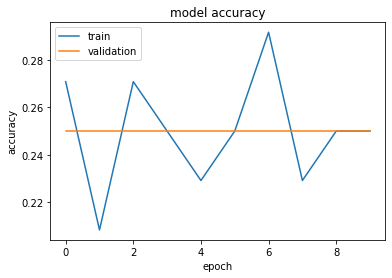

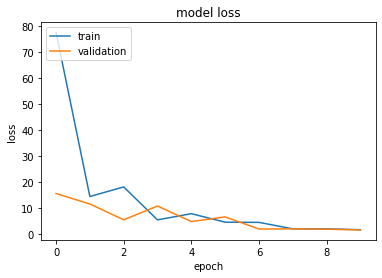

In [38]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

En este modelo no se modificó la estructura de VGG16, solo se configuró que capas son entrenables y cuales no. Puede verse que este modelo no funciona ya que no hay una mejora en el accuracy

### MODELO 2

Para este modelo se usará a VGG16 donde todos los bloques convolucionales se congelarán durante el entrenamiento, la parte que corresponde a una red MLP se modificará. Posterior a la red convolucional se adicionarán 2 capas ocultas fully connected con 512 neuronas y activación Relu cada una. Para evitar overfitting después de cada capa oculta se configura dropout y la capa de salida con activación Softmax al ser un problema de clasificación multivariable. 

Para compilar el modelo se utilizará el optimizador Adam, función de costo Categorical Cross Entropy y como métrica Accuracy.

In [323]:
# Carga del Modelo
vggmodel2 = VGG16(weights='imagenet', include_top=False, input_shape = (224, 224, 3)) 
vggmodel2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [324]:
output = vggmodel2.layers[-1].output
output = Flatten()(output)
vgg_model2 = Model(inputs = vggmodel2.input, outputs = output)

vgg_model2.trainable = False
for layer in vgg_model2.layers:
    layer.trainable = False

In [325]:
import pandas as pd
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

# Puede verse que toda la parte que corresponde a la red convolucional es no entrenable

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000021B4A112208>,input_32,False
1,<keras.layers.convolutional.Conv2D object at 0x0000021B4A1302C8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000021B4A112A88>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x0000021B4A0F9788>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x0000021B4A074E88>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000021B36C78F48>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x0000021B4A3135C8>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x0000021B4A127148>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000021B50B7D388>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000021B50BA7F48>,block3_conv3,False


In [142]:
# Modelo con las features extraidas

model = Sequential()
model.add(vgg_model2)
model.add(Dense(512, activation='relu', input_dim=inputS))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_9 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_65 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 4)                 2052      
Total params: 27,824,964
Trainable params: 13,110,276
Non-trainable params: 14,714,688
________________________________

In [143]:
history3 = model.fit_generator(generator= train_set, 
                          steps_per_epoch= 2, 
                          epochs= 10, 
                          validation_data= validation_set)

Epoch 1/10
2/2 [==============================] - 30s 15s/step - loss: 1.9294 - accuracy: 0.2917 - val_loss: 3.2109 - val_accuracy: 0.4167
Epoch 2/10
2/2 [==============================] - 35s 17s/step - loss: 3.6145 - accuracy: 0.3958 - val_loss: 2.8088 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 32s 16s/step - loss: 1.9156 - accuracy: 0.5208 - val_loss: 1.7429 - val_accuracy: 0.5833
Epoch 4/10
2/2 [==============================] - 32s 16s/step - loss: 1.3273 - accuracy: 0.5833 - val_loss: 1.3350 - val_accuracy: 0.5833
Epoch 5/10
2/2 [==============================] - 31s 16s/step - loss: 1.2518 - accuracy: 0.6875 - val_loss: 1.2289 - val_accuracy: 0.3333
Epoch 6/10
2/2 [==============================] - 33s 17s/step - loss: 0.9644 - accuracy: 0.6667 - val_loss: 1.2118 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 32s 16s/step - loss: 0.2730 - accuracy: 0.8958 - val_loss: 1.1309 - val_accuracy: 0.6667
Epoch 8/10
2/2 [===========

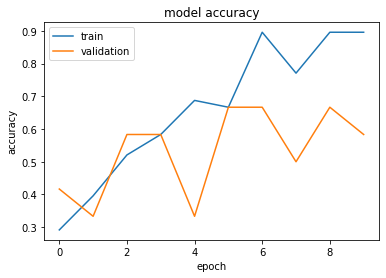

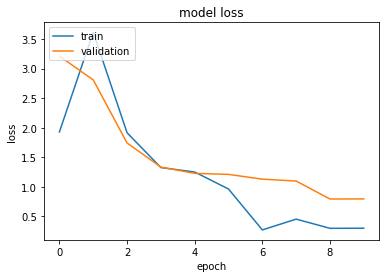

In [144]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Puede verse que este modelo sufre de overfitting, por lo que se intentará cambiar un poco la configuración de la red Fully Connected. Se disminuirá el número de neuronas en la segunda capa oculta, se configurará Batch Normalization y regularización L1 y L2 para evaluar si estas técnicas ayudan a reducir el overfitting. Se intentará también con el optimizador RMSprop

In [181]:
# Modelo con técnicas para disminuir overfitting

inputS = vgg_model2.output_shape[1]

model = Sequential()
model.add(vgg_model2)
model.add(Dense(512, activation='relu', input_dim=inputS, kernel_regularizer=l1_l2(l1=0.001, l2=0.003)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.003)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_9 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_114 (Dense)            (None, 512)               12845568  
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_71 (Dropout)         (None, 256)             

Epoch 1/10
2/2 [==============================] - 36s 18s/step - loss: 99.9619 - accuracy: 0.5000 - val_loss: 75.1905 - val_accuracy: 0.4167
Epoch 2/10
2/2 [==============================] - 34s 17s/step - loss: 68.6081 - accuracy: 0.8750 - val_loss: 56.7027 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 33s 16s/step - loss: 51.9816 - accuracy: 1.0000 - val_loss: 45.2771 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 33s 17s/step - loss: 42.2534 - accuracy: 1.0000 - val_loss: 39.2113 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 32s 16s/step - loss: 37.0772 - accuracy: 0.9792 - val_loss: 35.4781 - val_accuracy: 0.4167
Epoch 6/10
2/2 [==============================] - 34s 17s/step - loss: 33.6139 - accuracy: 1.0000 - val_loss: 32.2932 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 32s 16s/step - loss: 30.5887 - accuracy: 1.0000 - val_loss: 29.5587 - val_accuracy: 0.5000
Epoch 8/10
2/

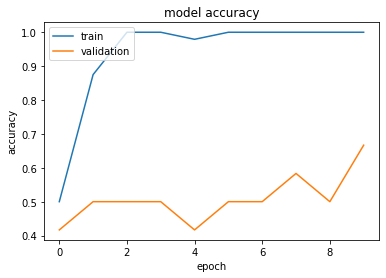

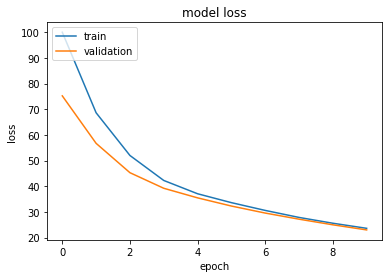

In [177]:
history4 = model.fit_generator(generator= train_set, 
                          steps_per_epoch= 2, 
                          epochs= 10, 
                          validation_data= validation_set)

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/10
10/10 [==============================] - 146s 15s/step - loss: 59.6961 - accuracy: 0.8583 - val_loss: 36.2369 - val_accuracy: 0.4167
Epoch 2/10
10/10 [==============================] - 159s 16s/step - loss: 27.5942 - accuracy: 1.0000 - val_loss: 23.0002 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 148s 15s/step - loss: 18.9124 - accuracy: 0.9750 - val_loss: 17.9137 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 140s 14s/step - loss: 14.3261 - accuracy: 0.9958 - val_loss: 13.0208 - val_accuracy: 0.4167
Epoch 5/10
10/10 [==============================] - 143s 14s/step - loss: 12.5042 - accuracy: 0.9500 - val_loss: 13.6297 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 143s 14s/step - loss: 10.5683 - accuracy: 1.0000 - val_loss: 10.0508 - val_accuracy: 0.5833
Epoch 7/10
10/10 [==============================] - 142s 14s/step - loss: 11.2435 - accuracy: 0.9375 - val_loss: 12.4748 - val_accuracy:

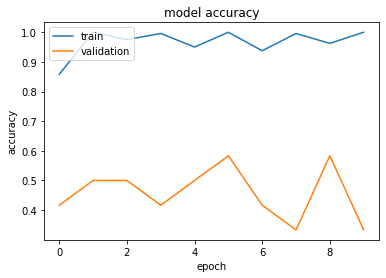

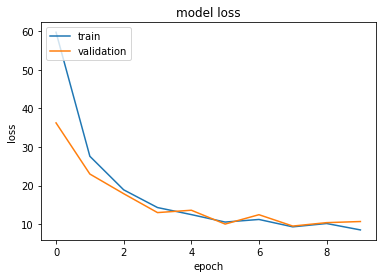

In [182]:
history5 = model.fit_generator(generator= train_set, 
                          steps_per_epoch= 10, 
                          epochs= 10, 
                          validation_data= validation_set)

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Puede verse que con técnicas de regularización el modelo no reduce el overfitting, por lo cual se intentará con reducir la complejidad del modelo. Para esto se eliminarán las capas ocultas de la red Fully Connected y se conectarán los bloques convolucionales de VGG16 a la capa de salida con activación softmax, entre ellas se colocará un dropout para ayudar también al overfitting.

También se empieza con agregar el checkpoint para guardar los parámetros conforme se vaya entrenando el modelo.

In [211]:
# Modelo sin capas ocultas, LR = 0.001

model = Sequential()
model.add(vgg_model2)
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_10 (Model)             (None, 25088)             14714688  
_________________________________________________________________
dropout_78 (Dropout)         (None, 25088)             0         
_________________________________________________________________
dense_124 (Dense)            (None, 4)                 100356    
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [351]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


filepath="Checkpoint.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_ac', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# checkpoint to stop training if model didn't improve valid loss for 3 epochs
callback_early_stopping = EarlyStopping(monitor="val_loss", patience=5)

Epoch 1/30
12/12 [==============================] - 26s 2s/step - loss: 2.6797 - accuracy: 0.2917 - val_loss: 0.2524 - val_accuracy: 0.4167

Epoch 00001: val_loss improved from inf to 0.25235, saving model to Checkpoint.hdf5
Epoch 2/30
12/12 [==============================] - 23s 2s/step - loss: 1.6439 - accuracy: 0.4583 - val_loss: 2.5304 - val_accuracy: 0.4167

Epoch 00002: val_loss did not improve from 0.25235
Epoch 3/30
12/12 [==============================] - 23s 2s/step - loss: 0.8741 - accuracy: 0.6667 - val_loss: 1.2734 - val_accuracy: 0.5833

Epoch 00003: val_loss did not improve from 0.25235
Epoch 4/30
12/12 [==============================] - 22s 2s/step - loss: 0.5711 - accuracy: 0.7917 - val_loss: 0.0052 - val_accuracy: 0.5000

Epoch 00004: val_loss improved from 0.25235 to 0.00523, saving model to Checkpoint.hdf5
Epoch 5/30
12/12 [==============================] - 24s 2s/step - loss: 0.4173 - accuracy: 0.8750 - val_loss: 0.6320 - val_accuracy: 0.6667

Epoch 00005: val_loss

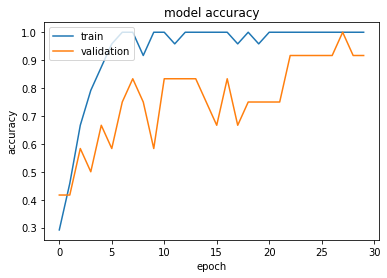

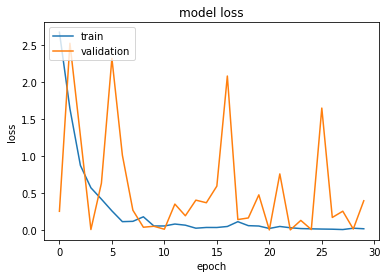

In [213]:
history7 = model.fit_generator(generator= train_set,  
                               epochs= 30, 
                               validation_data= validation_set,
                               callbacks=[checkpoint])

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [356]:
# Modelo sin capas ocultas, LR = 0.0001

model = Sequential()
model.add(vgg_model2)
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_11 (Model)             (None, 25088)             14714688  
_________________________________________________________________
batch_normalization_36 (Batc (None, 25088)             100352    
_________________________________________________________________
dropout_89 (Dropout)         (None, 25088)             0         
_________________________________________________________________
dense_138 (Dense)            (None, 4)                 100356    
Total params: 14,915,396
Trainable params: 150,532
Non-trainable params: 14,764,864
_________________________________________________________________


Epoch 1/30
12/12 [==============================] - 16s 1s/step - loss: 1.6921 - accuracy: 0.2500 - val_loss: 1.7666 - val_accuracy: 0.2500
Epoch 2/30


C:\Users\Elda Calderon\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_ac available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


12/12 [==============================] - 14s 1s/step - loss: 1.2347 - accuracy: 0.6250 - val_loss: 1.7555 - val_accuracy: 0.2500
Epoch 3/30
12/12 [==============================] - 14s 1s/step - loss: 1.7134 - accuracy: 0.5417 - val_loss: 1.5034 - val_accuracy: 0.3333
Epoch 4/30
12/12 [==============================] - 15s 1s/step - loss: 0.6738 - accuracy: 0.7917 - val_loss: 1.2982 - val_accuracy: 0.3333
Epoch 5/30
12/12 [==============================] - 17s 1s/step - loss: 0.9290 - accuracy: 0.7500 - val_loss: 1.2473 - val_accuracy: 0.4167
Epoch 6/30
12/12 [==============================] - 14s 1s/step - loss: 0.6702 - accuracy: 0.7917 - val_loss: 1.0781 - val_accuracy: 0.5833
Epoch 7/30
12/12 [==============================] - 15s 1s/step - loss: 0.8538 - accuracy: 0.7083 - val_loss: 0.8886 - val_accuracy: 0.6667
Epoch 8/30
12/12 [==============================] - 15s 1s/step - loss: 0.8732 - accuracy: 0.7083 - val_loss: 0.6211 - val_accuracy: 0.8333
Epoch 9/30
12/12 [=============

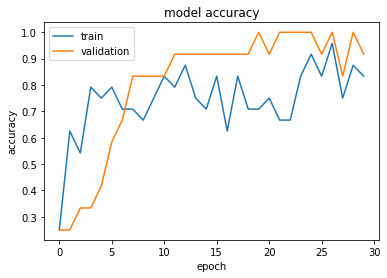

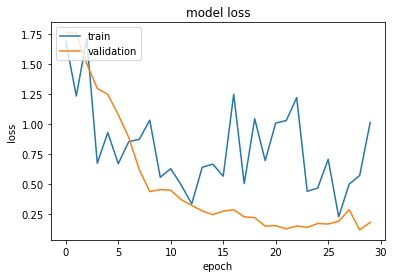

In [357]:
history8 = model.fit_generator(generator= train_set,  
                               epochs= 30, 
                               validation_data= validation_set,
                               callbacks=[checkpoint])

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/30
12/12 [==============================] - 23s 2s/step - loss: 1.9178 - accuracy: 0.1667 - val_loss: 1.3762 - val_accuracy: 0.1667

Epoch 00001: val_loss did not improve from 0.00002
Epoch 2/30
12/12 [==============================] - 22s 2s/step - loss: 1.7846 - accuracy: 0.1667 - val_loss: 1.1531 - val_accuracy: 0.2500

Epoch 00002: val_loss did not improve from 0.00002
Epoch 3/30
12/12 [==============================] - 23s 2s/step - loss: 1.3046 - accuracy: 0.3333 - val_loss: 1.7575 - val_accuracy: 0.4167

Epoch 00003: val_loss did not improve from 0.00002
Epoch 4/30
12/12 [==============================] - 23s 2s/step - loss: 1.3400 - accuracy: 0.4583 - val_loss: 0.7433 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.00002
Epoch 5/30
12/12 [==============================] - 25s 2s/step - loss: 1.2716 - accuracy: 0.5000 - val_loss: 0.6875 - val_accuracy: 0.5000

Epoch 00005: val_loss did not improve from 0.00002
Epoch 6/30
12/12 [======================

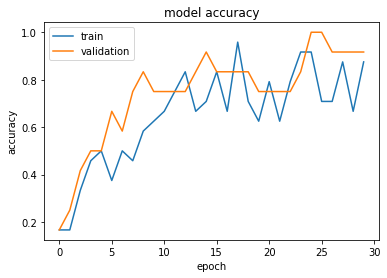

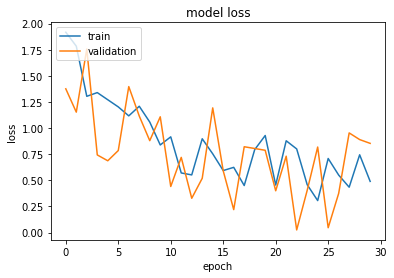

In [215]:
history8 = model.fit_generator(generator= train_set,  
                               epochs= 30, 
                               validation_data= validation_set,
                               callbacks=[checkpoint])

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Con estas modificaciones puede verse que el modelo funciona mejor, se probó con dos valores de learning rate obteniendo mejores resultados con 0.0001 y 0.0005.

## Representaciones Intermedias

In [536]:
vgg_model2.layers[-3]

In [537]:
vgg_model2.layers[-1]

In [526]:
# Representaciones Intermedias Capa Convolucional bloque 5 VGG
layer_output1 = vgg_model2.layers[-3].output
activation_model1 = Model(inputs=vgg_model2.layers[0].input,outputs=layer_output1)

layer_output2 = vgg_model2.layers[-5].output
activation_model2 = Model(inputs=vgg_model2.layers[0].input,outputs=layer_output2)

In [527]:
a1 = activation_model1.predict(test_set)
a2 = activation_model2.predict(test_set)

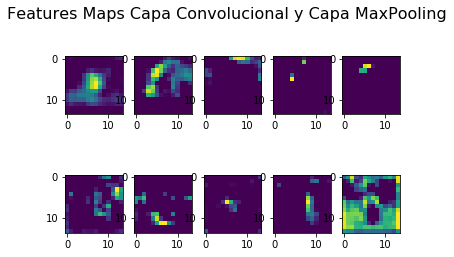

In [574]:
fig, ax = plt.subplots(2,5)
fig.suptitle('Features Maps Capa Convolucional y Capa MaxPooling', fontsize=16)
ax[0,0].imshow(a1[0,:,:,0]) # cuarto argumento es el filtro
ax[0,1].imshow(a1[0,:,:,2])
ax[0,2].imshow(a1[0,:,:,4])
ax[0,3].imshow(a1[0,:,:,6])
ax[0,4].imshow(a1[0,:,:,8])

ax[1,0].imshow(a2[0,:,:,0])
ax[1,1].imshow(a2[0,:,:,2])
ax[1,2].imshow(a2[0,:,:,4])
ax[1,3].imshow(a2[0,:,:,6])
ax[1,4].imshow(a2[0,:,:,8])

plt.show()

## Metricas del Modelo

In [329]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [358]:
test_real = np.array([0,0,0,1,1,1,2,2,3,3,3])
validation_real = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

In [363]:
model.evaluate(train_set)

12/12 [==============================] - 10s 817ms/step


[0.06454449146986008, 1.0]

In [362]:
model.evaluate(validation_set)

1/1 [==============================] - 5s 5s/step


[0.18027782440185547, 0.9166666865348816]

In [361]:
model.evaluate(test_set)

1/1 [==============================] - 4s 4s/step


[2.761528968811035, 0.7272727489471436]

# Prueba con Dataset de Animales

Se hizo otra prueba con otro dataset de animales, se ejecutaron pocos epochs dado el tiempo de entrenamiento

In [339]:
dataTrain = 'C:/Users/Elda Calderon/OneDrive/Data Science/3 Trimestre/Statistical Learning II/Proyecto/Parte 2/training'
dataTest = 'C:/Users/Elda Calderon/OneDrive/Data Science/3 Trimestre/Statistical Learning II/Proyecto/Parte 2/test'
dataValidation = 'C:/Users/Elda Calderon/OneDrive/Data Science/3 Trimestre/Statistical Learning II/Proyecto/Parte 2/validation'

In [340]:
# Formateo de Datos
from keras.preprocessing.image import ImageDataGenerator

# Pre-procesamiento para train con aumentation
train_datagen = ImageDataGenerator(
    rescale = 1./255., 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

# Pre-procesamiento para test
test_datagen = ImageDataGenerator(rescale = 1./255.)

# Pre-procesamiento para validation
validation_datagen = ImageDataGenerator(rescale = 1./255.)


# Configuracion imagenes de entrada para train y test
train_set = train_datagen.flow_from_directory(
    dataTrain,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
) #reducir imagenes al mismo tamano

validation_set = validation_datagen.flow_from_directory(
    dataValidation,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [341]:
# Modelo con las features extraidas

inputS = vgg_model2.output_shape[1]

model = Sequential()
model.add(vgg_model2)
model.add(Dense(512, activation='relu', input_dim=inputS, kernel_regularizer=l1_l2(l1=0.001, l2=0.003)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.003)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_11 (Model)             (None, 25088)             14714688  
_________________________________________________________________
dense_132 (Dense)            (None, 512)               12845568  
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_84 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_32 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_85 (Dropout)         (None, 256)             

Epoch 1/10
38/38 [==============================] - 1516s 40s/step - loss: 52.5804 - accuracy: 0.7829 - val_loss: 26.3713 - val_accuracy: 0.6600
Epoch 2/10
38/38 [==============================] - 1554s 41s/step - loss: 16.4855 - accuracy: 0.8433 - val_loss: 13.3975 - val_accuracy: 0.7400
Epoch 3/10
38/38 [==============================] - 1496s 39s/step - loss: 11.5865 - accuracy: 0.8233 - val_loss: 11.7729 - val_accuracy: 0.7967
Epoch 4/10
38/38 [==============================] - 1404s 37s/step - loss: 10.2676 - accuracy: 0.8375 - val_loss: 10.3187 - val_accuracy: 0.6233
Epoch 5/10
38/38 [==============================] - 1562s 41s/step - loss: 9.4210 - accuracy: 0.8213 - val_loss: 10.1539 - val_accuracy: 0.5100
Epoch 6/10
38/38 [==============================] - 1486s 39s/step - loss: 8.6195 - accuracy: 0.8379 - val_loss: 8.2825 - val_accuracy: 0.8067
Epoch 7/10
38/38 [==============================] - 1487s 39s/step - loss: 7.8164 - accuracy: 0.8396 - val_loss: 7.8389 - val_accurac

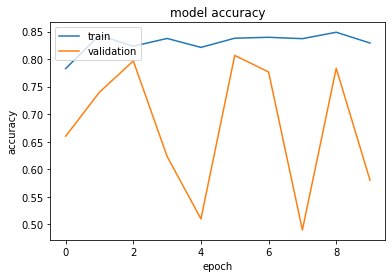

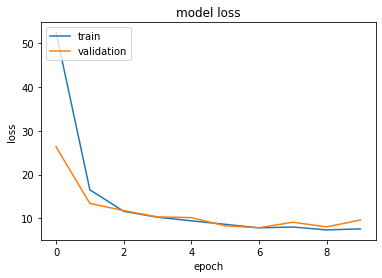

In [342]:
history6 = model.fit_generator(generator= train_set, 
                          epochs= 10, 
                          validation_data= validation_set)

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [346]:
model.evaluate(train_set)

38/38 [==============================] - 1197s 32s/step


[8.777352333068848, 0.5358333587646484]

In [347]:
model.evaluate(validation_set)

10/10 [==============================] - 162s 16s/step


[8.583549499511719, 0.5799999833106995]

## Checkpoints

Anteriormente se habia aplicado un checkpoint y earlystopping como callbacks del modelo

## Cargando el Checkpoint

In [568]:
model.load_weights("Checkpoint.hdf5")

In [571]:
model.evaluate(validation_set)

1/1 [==============================] - 5s 5s/step


[0.35356342792510986, 0.9166666865348816]

# Conclusiones

Para la red neuronal del tipo Convolucional se eligió trabajar con un problema de clasificación con imágenes de mini figuras de Lego.

Dado que el dataset con el que se contaba era considerablemente muy pequeño se decidió desde el inicio hacer transfer learning con el modelo VGG16, ya que de esta forma se usaría esta arquitectura como extractor de características para realizar la clasificación. También se aplicó data augmentation para compensar el tamaño del dataset a trabajar.

Se trabajo con un modelo dejando la parte convolucional perteneciente a VGG16 y se probó con algunas configuraciones de la red fully connected. Dado que los primeros presentaban overfitting se decidió eliminar las capas ocultas de la red densa y conectar la salida convolucional de VGG16 con dropout y posterior a la capa de salida con softmax.

Al realizar esto, se pasó de tener 14,815,044 de parámetros entrenables a únicamente 100,356 y con lo cual se combatió en buena medida el overfitting. Puede verse como simplificando el modelo puede ayudar a mejorar el desempeño para datos no vistos por el mismo.

En la parte de métricas, para el dataset de validación se obtuvo un accuracy de 91%, mientras que en el de test alrededor de 73%. Estos resultados son aceptables considerando el tamaño del dataset, aunque también se aumentó la data al hacer variaciones en las imágenes con DataGenerator.

En cuanto al checkpoint, dado que se utilizó un modelo Sequential en Keras se puede hacer uso de la función ModelCheckpoint y se puede especificar si se requiere guardar únicamente los parámetros cuando hay una mejora en una métrica como en la de Accuracy o en la función de costo con el parámetro Loss, lo que fue empleado en el ejemplo. Luego se pasa el checkpoint como parámetro a la función fit para que se genere el checkpoint durante el entrenamiento.

Esto puede ser útil para tener puntos de control durante el entrenamiento por cualquier contingencia, ya que los entrenamientos en redes convolucionales puede tomar bastante tiempo según el tamaño del dataset con que se cuente. Por ejemplo, para un último experimento que se hizo con fotografías de animales se corrió por 10 epochs. Sin embargo, como el dataset era más grande el tiempo de entrenamiento fue significativo, por lo que es altamente recomendable agregar checkpoints o bien early stopping por si no hay mejora en el entrenamiento el mismo pueda detenerse para no perder tiempo en un experimento.